In [1]:
# import dependencies
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plot
from sklearn.ensemble import RandomForestClassifier

In [65]:
# from google.colab import drive

# drive.mount('/content/drive')

In [2]:
# Read in CSV
# cred_data = pd.read_csv('drive/MyDrive/Loan_Eligibility_ML/Resources/credit_risk_dataset.csv')
cred_data = pd.read_csv('./Resources/credit_risk_dataset.csv')

# Create dataframe
cred_df = pd.DataFrame(cred_data)
cred_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [3]:
# check initial length before cleaning
len(cred_df.index)

32581

In [4]:
# Drop null values
clean_cred_df = cred_df.dropna(axis=0, how='any')

In [5]:
len(clean_cred_df.index)

28638

In [6]:
# check age and drop any odd values
clean_cred_df.drop(clean_cred_df[clean_cred_df['person_age']>= 100].index, inplace=True)
clean_cred_df['person_age'].unique()

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_18488\4041936413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.drop(clean_cred_df[clean_cred_df['person_age']>= 100].index, inplace=True)


array([22, 21, 25, 23, 24, 26, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       50, 37, 39, 40, 43, 41, 46, 38, 47, 42, 44, 48, 45, 49, 58, 65, 51,
       53, 66, 57, 59, 62, 54, 60, 55, 52, 61, 64, 70, 78, 69, 56, 73, 63,
       80, 84, 76, 67], dtype=int64)

In [7]:
# # check agefor any outliers
# clean_cred_df['person_age']

# age_outlier = clean_cred_df['person_age']
# quartiles = np.quantile(age_outlier,[.25,.75])
# iqr = quartiles[1]-quartiles[0]
# lower_bound = quartiles[0]-(1.5*iqr)
# upper_bound = quartiles[1]+(1.5*iqr)
# print (f"quartiles = {quartiles} & IQR = {iqr}")
# print (f"lower bound = {lower_bound} & upper bound = {upper_bound}")
# potential_outliers_age_outlier = [value for value in age_outlier if value < lower_bound or value > upper_bound]
# len(potential_outliers_age_outlier)

In [8]:
# clean_cred_df = clean_cred_df.drop(clean_cred_df[clean_cred_df['person_age'] > 40.5].index)

In [9]:
# Convert cb_person_default_on_file	 to 0 = y and 1 = n
clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'Y'] = 0
clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'N'] = 1

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_18488\82347455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'Y'] = 0
C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_18488\82347455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'N'] = 1


In [10]:
# Use get_dummies to convert columns to int
clean_cred_df = pd.get_dummies(clean_cred_df,
                            columns=['person_home_ownership', 'loan_intent'], dtype=int)

In [11]:
clean_cred_df = clean_cred_df.drop(columns=['loan_intent_VENTURE', 'person_home_ownership_OTHER'])

In [12]:
clean_cred_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
0,22,59000,123.0,35000,16.02,1,0.59,0,3,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,1,2,0,1,0,0,1,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,1,3,1,0,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,1,2,0,0,1,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,0,4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,1,30,1,0,0,0,0,0,0,1
32577,54,120000,4.0,17625,7.49,0,0.15,1,19,1,0,0,0,0,0,0,1
32578,65,76000,3.0,35000,10.99,1,0.46,1,28,0,0,1,0,0,1,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,1,26,1,0,0,0,0,0,0,1


In [13]:
clean_cred_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
count,28634.000000,2.863400e+04,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000,28634.000000
mean,27.711706,6.643063e+04,4.788573,9656.577845,11.039718,0.216631,0.169501,5.793392,0.412063,0.076552,0.508102,0.159426,0.199134,0.111685,0.184850,0.170287
std,6.171993,5.155102e+04,4.154660,6329.645284,3.229540,0.411956,0.106387,4.037040,0.492215,0.265884,0.499943,0.366079,0.399356,0.314985,0.388183,0.375891
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.946200e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


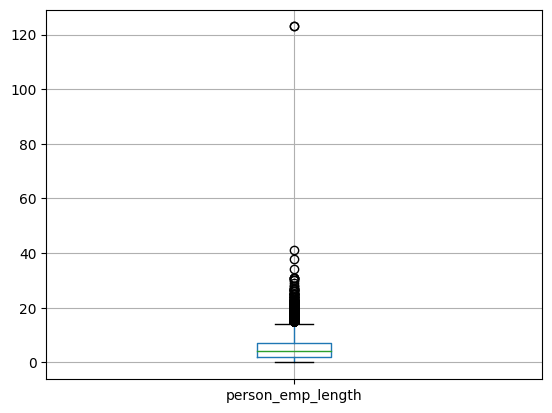

In [14]:
# Create plot box for numeric columns to look for outliers
# emp length
b_plot_emp = clean_cred_df.boxplot(column = ['person_emp_length']) 
b_plot_emp.plot()
plot.show()

In [15]:
# check employment length and drop any odd values
clean_cred_df.drop(clean_cred_df[clean_cred_df['person_emp_length']>= 60].index, inplace=True)
clean_cred_df['person_emp_length'].unique()

array([ 5.,  1.,  4.,  8.,  2.,  6.,  7.,  0.,  9.,  3., 10., 11., 18.,
       12., 17., 14., 16., 13., 19., 15., 22., 20., 21., 24., 23., 26.,
       25., 27., 31., 28., 41., 34., 29., 38., 30.])

In [16]:
# check agefor any employment length
# clean_cred_df['person_emp_length']

emp_outlier = clean_cred_df['person_emp_length']
quartiles = np.quantile(emp_outlier,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")
print (f"lower bound = {lower_bound} & upper bound = {upper_bound}")
potential_outliers_emp_outlier = [value for value in emp_outlier if value < lower_bound or value > upper_bound]
len(potential_outliers_emp_outlier)

quartiles = [2. 7.] & IQR = 5.0
lower bound = -5.5 & upper bound = 14.5


771

In [17]:
clean_cred_df = clean_cred_df.drop(clean_cred_df[clean_cred_df['person_emp_length'] > 14.5].index)

In [18]:
# # check loan_percent_income and drop any odd values
# clean_cred_df.drop(clean_cred_df[clean_cred_df['loan_percent_income']<= .01].index, inplace=True)
# clean_cred_df['loan_percent_income'].unique()

In [19]:
check loan percent income for any outliers


loanper_outlier = clean_cred_df['loan_percent_income']
quartiles = np.quantile(loanper_outlier,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")
print (f"lower bound = {lower_bound} & upper bound = {upper_bound}")
potential_outliers_loanper_outlier = [value for value in loanper_outlier if value < lower_bound or value > upper_bound]
len(potential_outliers_loanper_outlier)

SyntaxError: invalid syntax (2565441848.py, line 1)

In [20]:
clean_cred_df = clean_cred_df.drop(clean_cred_df[clean_cred_df['loan_percent_income'] > 0.44].index)

In [21]:
# check interest rates for any outliers
clean_cred_df['loan_int_rate']

int_outlier = clean_cred_df['loan_int_rate']
quartiles = np.quantile(int_outlier,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")
print (f"lower bound = {lower_bound} & upper bound = {upper_bound}")
potential_outliers_int_outlier = [value for value in int_outlier if value < lower_bound or value > upper_bound]
potential_outliers_int_outlier

quartiles = [ 7.9  13.48] & IQR = 5.58
lower bound = -0.47000000000000064 & upper bound = 21.85


[22.11, 22.11, 22.06, 22.11, 22.48, 23.22]

In [22]:
clean_cred_df = clean_cred_df.drop(clean_cred_df[clean_cred_df['loan_int_rate'] > 21.85].index)

In [23]:
# Define features set
X = clean_cred_df.copy()
X.drop("loan_status", axis=1, inplace=True)
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
1,21,9600,5.0,1000,11.14,0.10,1,2,0,1,0,0,1,0,0,0
5,21,9900,2.0,2500,7.14,0.25,1,2,0,1,0,0,0,0,0,0
7,24,78956,5.0,35000,11.11,0.44,1,4,0,0,1,0,0,0,1,0
8,24,83000,8.0,35000,8.90,0.42,1,2,0,0,1,0,0,0,0,1
9,21,10000,6.0,1600,14.74,0.16,1,3,0,1,0,0,0,0,0,0


In [24]:
# Define target vector
y = clean_cred_df["loan_status"].values.reshape(-1, 1)
y = y.astype('int')
y[:5]

array([[0],
       [1],
       [1],
       [1],
       [1]])

In [25]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [26]:
# Scale data
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [28]:
# Fit the model from decision tree classifier
model = model.fit(X_train_scaled, y_train)

In [29]:
# Making predictions using the testing data from decision tree classifier
predictions = model.predict(X_test_scaled)

In [30]:
# Calculating the confusion matrix for decision tree classifier
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results of decision tree classifier
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix
Accuracy Score : 0.8745241581259151
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5464
           1       0.68      0.72      0.70      1366

    accuracy                           0.87      6830
   macro avg       0.80      0.82      0.81      6830
weighted avg       0.88      0.87      0.88      6830



In [32]:
# Remaking model with SVC
from sklearn.svm import SVC 
model_2 = SVC(kernel='linear')
model_2 = model_2.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Making predictions using the testing data from SVC model
predictions_2 = model_2.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix for SVC
cm_2 = confusion_matrix(y_test, predictions_2)
cm_2_df = pd.DataFrame(
    cm_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)

In [35]:
# Displaying results of decision tree classifier
print("Confusion Matrix")
display(cm_2_df)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test, predictions_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5253,211
Actual 1,804,562


Accuracy Score : 0.8513909224011713
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5464
           1       0.73      0.41      0.53      1366

    accuracy                           0.85      6830
   macro avg       0.80      0.69      0.72      6830
weighted avg       0.84      0.85      0.83      6830



In [36]:
# Remaking model with Logistic Regression
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3 = model_3.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Making predictions using the testing data from logistic regression
predictions_3 = model_3.predict(X_test_scaled)

In [38]:
# Calculating the confusion matrix for logistic regression
cm_3 = confusion_matrix(y_test, predictions_3)
cm_3_df = pd.DataFrame(
    cm_3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_3 = accuracy_score(y_test, predictions_3)

In [39]:
# Displaying results of logistic regression
print("Confusion Matrix")
display(cm_3_df)
print(f"Accuracy Score : {acc_score_3}")
print("Classification Report")
print(classification_report(y_test, predictions_3))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5195,269
Actual 1,744,622


Accuracy Score : 0.8516837481698389
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5464
           1       0.70      0.46      0.55      1366

    accuracy                           0.85      6830
   macro avg       0.79      0.70      0.73      6830
weighted avg       0.84      0.85      0.84      6830



In [40]:
# Remaking model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors=9)
model_4 = model_4.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
# Making predictions using the testing data from KNeighborsClassifier
predictions_4 = model_4.predict(X_test_scaled)

In [42]:
# Calculating the confusion matrix for logistic regression
cm_4 = confusion_matrix(y_test, predictions_4)
cm_4_df = pd.DataFrame(
    cm_4, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_4 = accuracy_score(y_test, predictions_4)

In [43]:
# Displaying results of logistic regression
print("Confusion Matrix")
display(cm_4_df)
print(f"Accuracy Score : {acc_score_4}")
print("Classification Report")
print(classification_report(y_test, predictions_4))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5325,139
Actual 1,688,678


Accuracy Score : 0.8789165446559297
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5464
           1       0.83      0.50      0.62      1366

    accuracy                           0.88      6830
   macro avg       0.86      0.74      0.77      6830
weighted avg       0.87      0.88      0.87      6830



In [44]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78, criterion='gini')

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_18488\2664256123.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [45]:
# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_rf_df = pd.DataFrame(
    cm_rf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_rf = accuracy_score(y_test, predictions_rf)

In [46]:
# Displaying results
print("Confusion Matrix")
display(cm_rf_df)
print(f"Accuracy Score : {acc_score_rf}")
print("Classification Report")
print(classification_report(y_test, predictions_rf))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5378,86
Actual 1,442,924


Accuracy Score : 0.9226939970717423
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5464
           1       0.91      0.68      0.78      1366

    accuracy                           0.92      6830
   macro avg       0.92      0.83      0.87      6830
weighted avg       0.92      0.92      0.92      6830

